In [254]:
import pandas as pd
import numpy as np


In [15]:
alcohol = pd.read_csv('drinks.csv', usecols=['country', 'wine_servings'], index_col='country').squeeze('columns')

In [14]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [9]:
alcohol = alcohol.sort_values(ascending = False)

In [21]:
alcohol.nunique()


71

In [32]:
alcohol.is_monotonic

C:\Users\Miranda and Warren\AppData\Local\Temp\ipykernel_216\3195558258.py:1: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  alcohol.is_monotonic


False

In [39]:
alcohol[alcohol.isnull()].size

31

In [58]:
drinks = alcohol

In [59]:
drinks

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [81]:
alcohol[alcohol.isnull()].index
for country in alcohol[alcohol.isnull()].index:
    print(alcohol.loc[country], end=',')

nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [73]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10, 'Afghanistan': 100, 'Yemen':101})
more_drinks

Albania          6
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

In [85]:
drinks

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [95]:
drinks.divide(more_drinks)

Afghanistan    NaN
Albania        9.0
Algeria        1.4
Andorra        NaN
Angola         NaN
              ... 
Venezuela      NaN
Vietnam        NaN
Yemen          NaN
Zambia         NaN
Zimbabwe       NaN
Length: 193, dtype: float64

### Calculating Variance and Standard Deviation

In [104]:
sample = pd.Series([1,3,5,6])
sample.mean()

x_minus_mean = sample.subtract([sample.mean() for _ in range(sample.size)])
x_minus_mean.multiply(x_minus_mean)

0.0

In [118]:
import math
(alcohol.fillna(100000).subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

1923517901.9202006

### Cumulative Operations

In [130]:
print(alcohol.sum())
alcohol.cumsum()

8221.0


country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [136]:
alcohol.prod()

3.427611505218281e+183

In [140]:
alcohol.cumprod().iloc[-1]

3.427611505218281e+183

In [144]:
alcohol.cummax()[-1] == alcohol.max()

True

In [146]:
alcohol.max()

339.0

## Pairwise Difference

In [165]:
alcohol['Afghanistan'] = pd.NA
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [153]:
alcohol.diff()

country
Afghanistan      NaN
Albania         53.0
Algeria        -40.0
Andorra        298.0
Angola        -267.0
               ...  
Venezuela       -8.0
Vietnam         -2.0
Yemen            NaN
Zambia           NaN
Zimbabwe         0.0
Name: wine_servings, Length: 193, dtype: float64

In [155]:
alcohol.diff(periods = 2)

country
Afghanistan      NaN
Albania          NaN
Algeria         13.0
Andorra        258.0
Angola          31.0
               ...  
Venezuela       -5.0
Vietnam        -10.0
Yemen            NaN
Zambia           3.0
Zimbabwe         NaN
Name: wine_servings, Length: 193, dtype: float64

## Series Iteration

In [174]:
mini_alcohol = alcohol.head(10)

for i in mini_alcohol.items():
    print(i)


[i for i in alcohol.items() if i[0] not in ['Albania']]

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


[('Afghanistan', nan),
 ('Algeria', 14.0),
 ('Andorra', 312.0),
 ('Angola', 45.0),
 ('Antigua & Barbuda', 45.0),
 ('Argentina', 221.0),
 ('Armenia', 11.0),
 ('Australia', 212.0),
 ('Austria', 191.0),
 ('Azerbaijan', 5.0),
 ('Bahamas', 51.0),
 ('Bahrain', 7.0),
 ('Bangladesh', nan),
 ('Barbados', 36.0),
 ('Belarus', 42.0),
 ('Belgium', 212.0),
 ('Belize', 8.0),
 ('Benin', 13.0),
 ('Bhutan', nan),
 ('Bolivia', 8.0),
 ('Bosnia-Herzegovina', 8.0),
 ('Botswana', 35.0),
 ('Brazil', 16.0),
 ('Brunei', 1.0),
 ('Bulgaria', 94.0),
 ('Burkina Faso', 7.0),
 ('Burundi', nan),
 ("Cote d'Ivoire", 7.0),
 ('Cabo Verde', 16.0),
 ('Cambodia', 1.0),
 ('Cameroon', 4.0),
 ('Canada', 1.0),
 ('Central African Republic', 1.0),
 ('Chad', 1.0),
 ('Chile', 172.0),
 ('China', 8.0),
 ('Colombia', 3.0),
 ('Comoros', 1.0),
 ('Congo', 9.0),
 ('Cook Islands', 74.0),
 ('Costa Rica', 11.0),
 ('Croatia', 254.0),
 ('Cuba', 5.0),
 ('Cyprus', 113.0),
 ('Czech Republic', 134.0),
 ('North Korea', nan),
 ('DR Congo', 1.0),
 ('D

## Filtering: filter(), where(), and mask()

In [190]:
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [194]:
alcohol.filter(like='he')

country
Netherlands                     19.0
St. Vincent & the Grenadines    11.0
Seychelles                      51.0
Name: wine_servings, dtype: float64

In [200]:
alcohol.loc[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [226]:
def greater_than(x):
    return (x > 200)

alcohol.loc[greater_than]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [227]:
alcohol.where(greater_than).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [229]:
alcohol.mask(greater_than).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

## Transforming with update(), apply() and map()

There are spot transforms and global transforms.

In [242]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [244]:
alcohol.loc['Albania'] = 190

In [245]:
alcohol.head()

country
Afghanistan      NaN
Albania        190.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [246]:
alcohol.update(pd.Series(data = [200, 20], index = ['Albania', 'Algeria']))

In [248]:
alcohol.head()

country
Afghanistan      NaN
Albania        200.0
Algeria         20.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [249]:
### The apply() method

In [252]:
alcohol.apply(lambda x: x**2)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [256]:
alcohol.apply(np.square)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [258]:
def multiply_by_self(x):
    return x*x

alcohol.apply(multiply_by_self)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [259]:
def multiply_by_self_with_min(x, min_servings):
    if x < min_servings:
        return x**2

    return x

In [265]:
alcohol.apply(multiply_by_self_with_min, args = [200])

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [267]:
alcohol.apply(multiply_by_self_with_min, min_servings = 200)

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [269]:
## the map() method

In [270]:
alcohol.map(lambda x:x **2)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

### Skills Challenge


In [293]:
beers = (pd.read_csv('drinks.csv', 
    usecols= [
        'country', 
        'beer_servings'
    ], 
    index_col = 'country')
    .squeeze('columns')
)

beers.name = 'beers'

In [294]:
beers

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela      333.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beers, Length: 193, dtype: float64

In [320]:
beers.describe()
beers[beers.isnull()].size

15

In [327]:
def both_lower(x):
    return x < beers.mean() 

(beers
    .dropna()
    .apply(lambda x: 'lower' if x<beers.mean() and x<beers.median()
     else 'higher' if x>beers.mean() and x>beers.median() else 'conflicting')
     .value_counts()
)

lower          89
higher         66
conflicting    23
Name: beers, dtype: int64

In [306]:
beers[:10] - beers.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beers, dtype: float64

In [285]:
beers.iloc[:10].subtract(beers.quantile(.5))

country
Afghanistan            NaN
Albania               29.0
Algeria              -35.0
Andorra              185.0
Angola               157.0
Antigua & Barbuda    -48.0
Argentina            133.0
Armenia              -39.0
Australia            201.0
Austria              219.0
Name: beer_servings, dtype: float64

In [350]:
from scipy.stats import zscore

(beers
    .subtract(beers.mean())
    .divide(beers.std())
    .abs()
    .multiply(beers.std()) 
    .add(beers.mean())
    .max()
)

376.0

In [346]:
beers.idxmax()
beers['Namibia']

376.0

In [341]:
beers[beers.idxmax()].index

AttributeError: 'numpy.float64' object has no attribute 'index'

<AxesSubplot: >

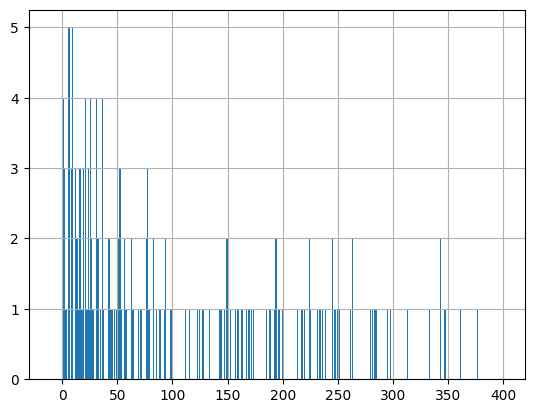

In [303]:
beers.hist(bins=np.arange(-10, 400, 1))